In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller, kpss

In [3]:
gafa_stock = pd.read_csv('rdata/gafa_stock.csv')

In [4]:
gafa_stock['Date'] = pd.to_datetime(gafa_stock.Date)

In [5]:
gafa_stock.drop('Unnamed: 0', axis=1, inplace=True)


In [6]:
gafa_stock

,Symbol,Date,Open,High,Low,Close,Adj_Close,Volume
0,AAPL,2014-01-02,79.382858,79.575714,78.860001,79.018570,66.964325,58671200.0
1,AAPL,2014-01-03,78.980003,79.099998,77.204285,77.282860,65.493416,98116900.0
2,AAPL,2014-01-06,76.778572,78.114288,76.228569,77.704285,65.850533,103152700.0
3,AAPL,2014-01-07,77.760002,77.994286,76.845711,77.148575,65.379593,79302300.0
4,AAPL,2014-01-08,76.972855,77.937141,76.955711,77.637146,65.793633,64632400.0
...,...,...,...,...,...,...,...,...
5027,GOOG,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300.0
5028,GOOG,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300.0
5029,GOOG,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800.0
5030,GOOG,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800.0


In [7]:
google_close = gafa_stock.query('Symbol == "GOOG"')[['Date','Close']]

In [8]:
google_close.set_index('Date', inplace=True)

In [9]:
google_close

,Close
Date,
2014-01-02,552.963501
2014-01-03,548.929749
2014-01-06,555.049927
2014-01-07,565.750366
2014-01-08,566.927673
...,...
2018-12-24,976.219971
2018-12-26,1039.459961
2018-12-27,1043.880005


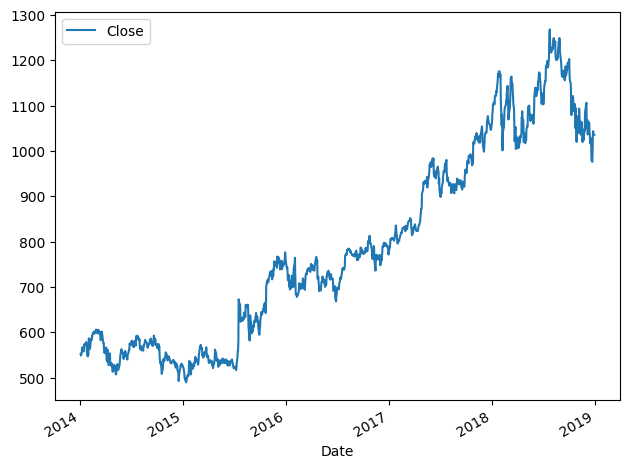

In [10]:
google_close.plot()
plt.tight_layout()
plt.show()

In [11]:
google_close['1st_diff'] = google_close.diff()
google_close

,Close,1st_diff
Date,,
2014-01-02,552.963501,NaN
2014-01-03,548.929749,-4.033752
2014-01-06,555.049927,6.120178
2014-01-07,565.750366,10.700439
2014-01-08,566.927673,1.177307
...,...,...
2018-12-24,976.219971,-3.320007
2018-12-26,1039.459961,63.239990
2018-12-27,1043.880005,4.420044


In [12]:
google_close['log_close'] = google_close['Close'].apply('log')

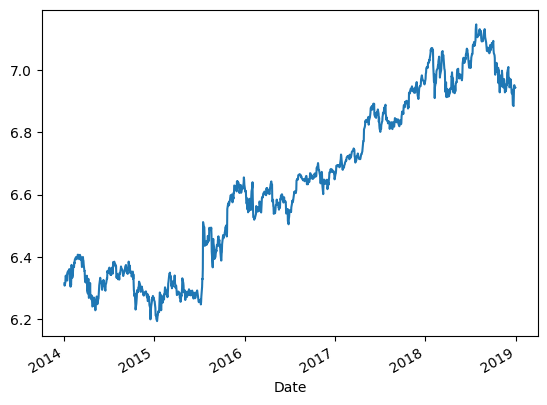

In [13]:
google_close.log_close.plot()
plt.show()

In [14]:
google_close['log_diff'] = google_close['log_close'].diff()


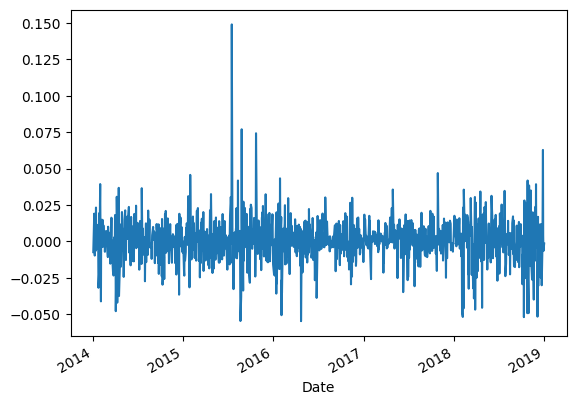

In [15]:

google_close.log_diff.plot()
plt.show()

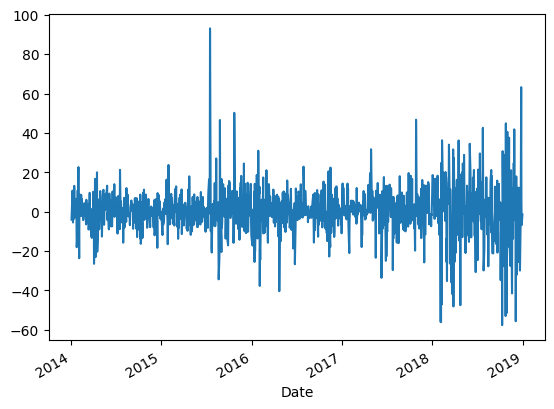

In [16]:
google_close['1st_diff'].plot()
plt.show()

In [17]:
X = google_close['log_diff'].dropna().values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
     print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.683803
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [18]:
result = adfuller(google_close.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.660046
p-value: 0.856829
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [19]:
X = google_close['1st_diff'].dropna().values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
     print('\t%s: %.3f' % (key, value))


ADF Statistic: -12.759613
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [20]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [21]:
X = google_close.log_diff.dropna().values
kpss_test(X)



KPSS Statistic: 0.04963164740569174
p-value: 0.1
num lags: 7
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\nickc\AppData\Local\Temp\ipykernel_23556\2791830141.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


In [22]:
google_close

,Close,1st_diff,log_close,log_diff
Date,,,,
2014-01-02,552.963501,NaN,6.315292,NaN
2014-01-03,548.929749,-4.033752,6.307970,-0.007322
2014-01-06,555.049927,6.120178,6.319058,0.011088
2014-01-07,565.750366,10.700439,6.338153,0.019095
2014-01-08,566.927673,1.177307,6.340232,0.002079
...,...,...,...,...
2018-12-24,976.219971,-3.320007,6.883688,-0.003395
2018-12-26,1039.459961,63.239990,6.946457,0.062769
2018-12-27,1043.880005,4.420044,6.950700,0.004243


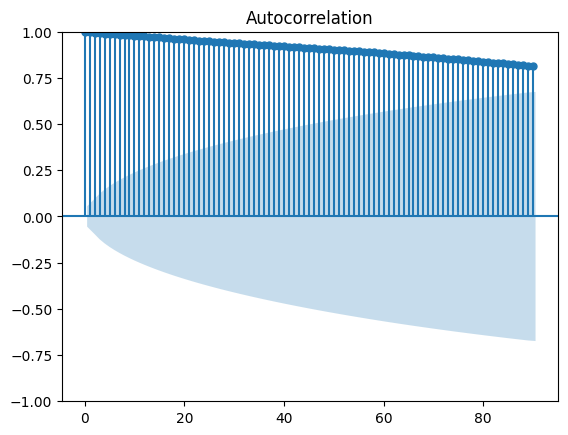

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(google_close['log_close'], lags= 90, alpha=0.05)
plt.show()
